# Numerical Computing with NumPy

## Introductory example

Python built-in collections like `list` offer a flexible way of storing and maniupulating data. As dicussed previously, collections usually just store references to objects. While this is every convenient when writing code, it comes with costs in performance in memory. 

Let's look at an example. Say we took one million measurements in an experiment and now want to compute the mean of it. We could do it in the following manner. 

In [1]:
import random 
measurements = [random.randint(150, 200) for _ in range(1_000_000)]
print(measurements[:100])

[170, 176, 179, 178, 151, 160, 162, 170, 161, 178, 192, 194, 158, 155, 178, 152, 163, 154, 170, 159, 154, 189, 194, 152, 161, 194, 197, 168, 153, 153, 170, 188, 188, 190, 150, 161, 174, 191, 200, 181, 186, 167, 196, 156, 150, 186, 195, 161, 189, 155, 180, 185, 182, 182, 158, 192, 178, 157, 181, 191, 197, 164, 196, 188, 168, 162, 155, 150, 155, 153, 181, 173, 164, 166, 183, 200, 189, 173, 161, 200, 195, 161, 195, 161, 168, 151, 185, 198, 165, 184, 154, 196, 196, 151, 184, 170, 171, 180, 193, 174]


This is rather slow since Python has to rebind a new variable in every loop and then has to check whether the `+` operation is supported between the `accumulator` and the current `measurement`. This prevents it from trying to add together objects that can't be added, but in this case we are pretty sure that we are only dealing with integers. If we could tell the interpreter that we are only adding integers, we could skip all that typechecking and speed up the operation. For this purpose, `numpy` was invented.  


In [2]:
def mean(values):
    accumulator = 0
    for value in values:
        accumulator += value
    mean_value = accumulator / len(values)
    return mean_value

%timeit mean(measurements)

39.8 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can already achieve faster calculations when trying to use as many of Python's built in function, such as `sum`.

In [3]:
%timeit sum(measurements) / len(measurements)

7.14 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


To use numpy we have to import it. The import is usuall aliased as `np` so we have to type less later on. Aliasing things is only recommended if it is well established in the community of the respective package.

In [4]:
import numpy as np

Numpy's standard datatype is the `ndarray` (which stands for n-dimensional array). In the simplest case, numpy array can be created from list.

In [5]:
measurements_array = np.array(measurements)
measurements_array

array([170, 176, 179, ..., 154, 183, 163])

In [6]:
type(measurements_array)

numpy.ndarray

They behave very similar to list, but have a fixed datatype underneath. Numpy automatically notices that all our values are intergers and chooses the appropriate datatype. An integer that takes up 64 bits of memory. https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [7]:
measurements_array.dtype

dtype('int64')

Indexing works just as with normal Python lists.

In [8]:
print(measurements_array[0])
print(measurements_array[10:15])

170
[192 194 158 155 178]


Moreover, numpy offers a lot of routines for mathematical operations of arrays. Let's see if we acually gained something by using numpy.

In [9]:
%timeit np.mean(measurements_array)

1.16 ms ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


A significant speedup in comparision to the pure Python implementations! After convincing ourselfs that NumPy is useful, we have a more in depth look at the numpy array.

## Anatomy of arrays
Every array has a bunch of attributes that yield inforation about what it is.

### dtype

`.dtype` gives information about the data type. arrays can contain bools, ints, unsigned ints, floats or complex numbers of various byte sizes. They can also store strings or Python objects, but that has very few use cases.

In [10]:
values = [0, 1, 2, 3, 4]
int_arr = np.array(values, dtype='int')
int_arr, int_arr.dtype

(array([0, 1, 2, 3, 4]), dtype('int64'))

If the dtype does not match the given values, numpy will cast everything to that data type.

In [11]:
bool_arr = np.array(values, dtype='bool')
bool_arr, bool_arr.dtype

(array([False,  True,  True,  True,  True]), dtype('bool'))

If no explicit data type is given, numpy will choose the "smallest common denominator". In the following example, everything becomes a float, as ints can be represented as floats, but not vice versa.

In [12]:
values = [0, 1, 2.5, 3, 4]
float_arr = np.array(values)
float_arr, float_arr.dtype

(array([0. , 1. , 2.5, 3. , 4. ]), dtype('float64'))

However, once the data type is set, everything will be coerced to that type.

In [13]:
int_arr[1] = 2.5
int_arr, int_arr.dtype

(array([0, 2, 2, 3, 4]), dtype('int64'))

These non-Python data types force us to again think about problems like overflow etc.

In [14]:
values = [0, 1, 2, 3, 4]
uint_arr = np.array(values, dtype='uint8')
uint_arr, uint_arr.dtype

(array([0, 1, 2, 3, 4], dtype=uint8), dtype('uint8'))

In [15]:
uint_arr[1] += 255
uint_arr

array([0, 0, 2, 3, 4], dtype=uint8)

...and can lead to some problems when comparing them to standard python types

In [16]:
print(type(measurements_array[0]), type(183))

<class 'numpy.int64'> <class 'int'>


In [17]:
val = 1.2 - 1.0
arr = np.array([val], dtype=np.float32)
print(f'{val} == {arr[0]} -> {val == arr[0]}')

0.19999999999999996 == 0.20000000298023224 -> False


For better comparisons, you can compare using an epsilon-value:

In [18]:
epsilon = 1e-6 # 1*10^(-6); 0.000001
abs(arr[0] - val) < epsilon

True

http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.htm

### shape and ndim
`.shape` is very important for keeping track of arrays with more than one dimension. It is a tuple with the number of elementns in each dimension. `.ndim` is just the number of dimensions in total. 

In [19]:
values = [0, 1, 2, 3, 4]
one_dim_arr = np.array(values)
one_dim_arr

array([0, 1, 2, 3, 4])

In [20]:
one_dim_arr.shape

(5,)

In [21]:
one_dim_arr.ndim

1

In [22]:
values = [[0, 1, 2, 3, 4]] * 3
two_dim_arr = np.array(values)
two_dim_arr

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [23]:
[[0, 1, 2, 3, 4]] * 3

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

In [24]:
two_dim_arr.shape

(3, 5)

In [25]:
two_dim_arr.ndim

2

In [26]:
two_dim_arr[1,1]

1

In [27]:
two_dim_arr[1,1] = 10
two_dim_arr

array([[ 0,  1,  2,  3,  4],
       [ 0, 10,  2,  3,  4],
       [ 0,  1,  2,  3,  4]])

In [28]:
values = [[[0, 1, 2, 3, 4]] * 3] * 6
three_dim_arr = np.array(values)
three_dim_arr

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [29]:
three_dim_arr.shape

(6, 3, 5)

In [30]:
three_dim_arr.ndim

3

### Other attributes

In [31]:
two_dim_arr

array([[ 0,  1,  2,  3,  4],
       [ 0, 10,  2,  3,  4],
       [ 0,  1,  2,  3,  4]])

In [32]:
two_dim_arr.T

array([[ 0,  0,  0],
       [ 1, 10,  1],
       [ 2,  2,  2],
       [ 3,  3,  3],
       [ 4,  4,  4]])

In [33]:
print(dir(two_dim_arr))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

## Creating arrays
We already saw how arrays can be created from Python lists (the same works with tuples). However, we often would like to create arrays directly, without creating Python objects. This can be accomplished by several utility functions.

The equivalent of `range`.

In [34]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [35]:
np.arange(start=2, stop=14, step=2)

array([ 2,  4,  6,  8, 10, 12])

Creating an array with a certain number of values in a certain interval.

In [36]:
np.linspace(start=-5, stop=5, num=9)

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

An array containing zeros. The default `dtype` is `float`.

In [37]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

`np.zeros` takes a `shape` argument that lets us create multidimensional arrays.

In [38]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

The same goes for `ones`, `empty` and `full`.

In [39]:
np.ones(shape=(2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [40]:
# Corresponds to whatever was left in memory. Using zeros for initialising arrays is usually saver.
np.empty(shape=(2, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [41]:
# empty is faster than initialized arrays but usually doesn't make a difference
%timeit np.empty(shape=100_000)
%timeit np.ones(shape=100_000)

1.39 µs ± 13.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
46.6 µs ± 647 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [42]:
np.full(shape=(2, 3, 2), fill_value=42)

array([[[42, 42],
        [42, 42],
        [42, 42]],

       [[42, 42],
        [42, 42],
        [42, 42]]])

### Exercise

Create a 3*3 array that solely consists of True

In [43]:
np.ones((3, 3), dtype=bool)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Random values
`np.random` contains a lot of functions to create arrays filled with random values of various probability distributions.

In [44]:
np.random.random((3, 3))

array([[0.29500011, 0.77097692, 0.85651183],
       [0.08847891, 0.36255753, 0.46293409],
       [0.08062183, 0.58096666, 0.76430065]])

In [45]:
np.random.randint(0, 10, (5, 5))

array([[9, 0, 5, 2, 9],
       [9, 8, 9, 5, 1],
       [1, 9, 6, 6, 3],
       [5, 2, 1, 0, 0],
       [0, 6, 7, 5, 7]])

Using ``np.random.randint`` and a boolean dtype, you can create random boolean arrays!

### Exercise
 
Create a 5x5 array in which *statistically* 1/4 of items are False, all others being True.

You can use the method ``astype(bool)`` to convert an integer-array into a boolean-array

In [46]:
np.random.randint(0, 4, (5, 5)).astype(bool)

array([[ True,  True,  True,  True, False],
       [ True, False,  True,  True, False],
       [ True,  True,  True, False,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

Note that in this array, there are only *on average* 1/4 elements of the elements True. To create an array where precisely 1/4 of elements are True, one would create an array with that many True's and ``shuffle`` it, as we'll see lateron.

### Repeating values

``np.repeat`` repeats elements of an array:

In [47]:
np.repeat(3, 5)

array([3, 3, 3, 3, 3])

In [48]:
np.repeat([[1,2],[3,4]], 2)

array([1, 1, 2, 2, 3, 3, 4, 4])

`np.tile` is another way of repeating values using NumPy.

In [49]:
print('Repeat:', np.repeat([1, 2, 3], 3))
print('Tile:', np.tile([1, 2, 3], 3))

Repeat: [1 1 1 2 2 2 3 3 3]
Tile: [1 2 3 1 2 3 1 2 3]


### Reshape

In [50]:
a = np.arange(start=2, stop=14)
print(a.shape)
a

(12,)


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [51]:
b = a.reshape(3, 4)
b

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

-1 as axis automatically figures out the size of the respective dimension

In [52]:
a.reshape(-1, 2)

array([[ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

### Example
We would like to create an 2D array where each row is [1, 2, 3] and it should have 10 rows.

In [53]:
np.repeat(np.arange(1, 4), 10).reshape(-1, 10).T
np.tile(np.arange(1, 4), 10).reshape(10, -1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### Comparing Arrays

In [54]:
epsilon = 0.000000000001
a = np.zeros((3,3))
a[0,0] += epsilon

b = np.zeros((3,3))
print(a)
print(b)

[[1.e-12 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [55]:
a == b

array([[False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [56]:
(a == b).all()

False

In [57]:
c = np.array([])
d = np.array([1])
(c == d).all()

True

flaws with doing this: 
* if either a or b is empty and the other one contains a single element, this will return True. (the comparison a==b returns an empty array, for which the all-operator returns True)
* If a and b don't have the same shape and aren't broadcastable, then this approach will raise an error.

Instead, use numpys provided functions!

In [58]:
np.array_equal(c, d)

False

In [59]:
np.allclose(a, b)

True

In [60]:
np.isclose(a, b)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Masking
Logical arrays, i.e. arrays containing boolean values, can be used to index other arrays. These logical arrays are then called masks. This is especially useful to index based on logical conditions.

In [61]:
# A simple integer array.
arr = np.arange(1, 6)
arr

array([1, 2, 3, 4, 5])

In [62]:
# A boolean array of the same shape as arr.
mask = np.array([True, False, True, False, True])
mask

array([ True, False,  True, False,  True])

Using the mask for indexing returns an array with only elements at positions where `mask` is `True`.  

In [63]:
arr[mask]

array([1, 3, 5])

Luckily for us, Operators in numpy work element-wise and return a boolean array:

In [64]:
arr < 10

array([ True,  True,  True,  True,  True])

Because of this, we can use direct comparison as a mask:

In [65]:
arr[arr < 3]

array([1, 2])

Maks can be used for assignment, which keeps the shape of the original array (thanks to *fancy indexing*, which will come up later)

### Exercise

Replace all odd numbers in the given array with -1

In [66]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
arr[arr%2==1] = -1
arr

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

## Mathematical operations
Numpy contains a lot of mathematical functions that operate on arrays in a vectorized manner. That means that they are applied to each element, without explicit for-loops. Vectorized functions are called `ufuncs` (universal functions) in Numpy.

### Standard arithmetic

In [68]:
arr = np.arange(9)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [69]:
arr * 3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [70]:
arr + (arr*2)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [71]:
arr - arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
arr / arr

/home/philipp/conda/envs/scientific_programming/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [73]:
arr * arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [74]:
arr ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

Using `@` you can even do matrix multiplication. In the case of 1d arrays, this is the inner product between two vectors.

In [75]:
arr @ arr

204

In [76]:
# That's the same as
np.sum(arr * arr)

204

Using these operators/universal function is usually faster than writing the operations otherwise.

In [77]:
var1 = lambda: np.repeat(np.arange(1, 4), 30).reshape(3, -1).T.flatten()
var2 = lambda: np.arange(3 * 30) % 3 + 1
var3 = lambda: np.array([[1, 2, 3] for _ in range(30)]).flatten()

%timeit var1()
%timeit var2()
%timeit var3()

7.9 µs ± 51.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.71 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
21 µs ± 695 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Some standard functions

In [78]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [79]:
np.log(arr)

/home/philipp/conda/envs/scientific_programming/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154])

In [80]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

In [81]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825])

np.sign returns -1 for negative values, +1 for positive ones, and 0 for 0:

In [82]:
np.sign(arr)

array([0, 1, 1, 1, 1, 1, 1, 1, 1])

Always try to use vectorized ufuncs instead of explicit loops!

### Broadcasting
What happens if you try to add arrays of different shapes? Numpy will try to expand the arrays according to three rules and try to make their shapes match, so the operation can be applied elementwise. 

**1. Rule** If the arrays have different numbers of dimensions, the smaller shape is padded with ones on its left side.<br/>
            Example: (5 x 3) + (3) &rarr; (5 x 3) + (**1** x 3)<br/>
**2. Rule** If the number of the dimensions matches, but the size of a dimension does not, dimensions with the size of 1 are expanded.<br/>
            Example: (5 x 3) + (1 x 3) &rarr; (5 x 3) + (**5** x 3)<br/>
**3. Rule** If the shapes of the  arrays still defer after applying the Rule 1 and 2, a broadcasting error is raised.

The figure below gives an illustration (source https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

![](broadcasting.png)

The Numpy documentation gives further insights https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html.

In [83]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [84]:
b = np.arange(3)
b

array([0, 1, 2])

In [85]:
a + b

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13],
       [12, 14, 16]])

Here is a case in which broadcasting fails.

In [86]:
c = np.arange(4)
a + c

ValueError: operands could not be broadcast together with shapes (5,3) (4,) 

### Aggregation functions
Aggregation functions are functions that reduce the dimensionality of an array. They provide an `axis` argument, to specify which dimension to reduce.

In [87]:
np.random.seed(1)
two_dim_arr = np.random.randint(0, high=20, size=(4, 4))
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12],
       [ 7, 13,  6, 18]])

If just the array is passed, the aggregation operation is performed over the whole array.

In [88]:
np.min(two_dim_arr)

0

The optional `axis` argument allows us to specify, which dimension should be aggregated. You can think of it as the operation being applied to all entries that are obtained by keeping the indices in all dimensions fixed except for the `axis` dimension.
Let's look at the result of the minimum operation with `axis=0`:

In [89]:
np.min(two_dim_arr, axis=0)

array([ 0, 11,  1,  8])

The axis concept extends to more than one dimension

In [90]:
np.random.seed(1)
three_dim_arr = np.random.randint(0, high=20, size=(4, 4, 4))
three_dim_arr

array([[[ 5, 11, 12,  8],
        [ 9, 11,  5, 15],
        [ 0, 16,  1, 12],
        [ 7, 13,  6, 18]],

       [[ 5, 18, 11, 10],
        [14, 18,  4,  9],
        [17,  0, 13,  9],
        [ 9,  7,  1,  0]],

       [[17,  8, 13, 19],
        [15, 10,  8,  7],
        [ 3,  6, 17,  3],
        [ 4, 17, 11, 12]],

       [[16, 13, 19,  9],
        [18, 15,  0,  4],
        [15,  2,  7,  8],
        [ 9,  3,  7,  4]]])

In [91]:
np.min(three_dim_arr, axis=0)

array([[ 5,  8, 11,  8],
       [ 9, 10,  0,  4],
       [ 0,  0,  1,  3],
       [ 4,  3,  1,  0]])

Here the entry at index `[0, 0]`, i.e. `5` is the minimum of the following values. 

In [92]:
for i in range(4):
    print(three_dim_arr[i, 0, 0])

5
5
17
16


Let's demonstrate all axes again with another three-dimensional array:

In [93]:
a = np.array([[[2,4],[6,9]],[[3,1],[7,8]],[[4,5],[9, 0]]])
a, a.shape

(array([[[2, 4],
         [6, 9]],
 
        [[3, 1],
         [7, 8]],
 
        [[4, 5],
         [9, 0]]]),
 (3, 2, 2))

In [94]:
np.min(a)

0

In [95]:
np.min(a, axis=0)

array([[2, 1],
       [6, 0]])

setting the axis-argument is the same as going through all other axes of the respective array in turn, returning the respective aggregate for every combination of these.

In [96]:
for i in range(a.shape[1]):
    for j in range(a.shape[2]):
        print(a[:, i, j])

[2 3 4]
[4 1 5]
[6 7 9]
[9 8 0]


For axis=1, we loop through axis 0 and axis 2:

In [97]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [98]:
np.min(a, axis=1)

array([[2, 4],
       [3, 1],
       [4, 0]])

In [99]:
for i in range(a.shape[0]):
    for j in range(a.shape[2]):
        print(a[i, :, j])

[2 6]
[4 9]
[3 7]
[1 8]
[4 9]
[5 0]


...and finally, for axis 2 we loop through axis 0 and 1

In [100]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [101]:
np.min(a, axis=2)

array([[2, 6],
       [1, 7],
       [4, 0]])

In [102]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i, j, :])

[2 4]
[6 9]
[3 1]
[7 8]
[4 5]
[9 0]


The shape of the resulting array is simply the shape of the original array, leaving the specified axis out:

In [103]:
mins = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        mins.append(min(a[i,j,:]))
np.array(mins).reshape([a.shape[0], a.shape[1]])

array([[2, 6],
       [1, 7],
       [4, 0]])

...however, of course, using numpy is much faster than looping over the array:

In [104]:
def find_min_manual(arr):
    mins = []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            mins.append(min(arr[i,j,:]))
    np.array(mins).reshape([arr.shape[0], arr.shape[1]])

%timeit find_min_manual(a)
%timeit np.min(a, axis=2)

21.4 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.19 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### np.nan

In [105]:
np.nan == np.nan

False

In [106]:
np.isnan(np.nan)

True

In [107]:
a = np.r_[np.arange(5), np.repeat(0, 5)]
a

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0])

In [108]:
b = a / a
b

/home/philipp/conda/envs/scientific_programming/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan])

In [109]:
~np.isnan(b)

array([False,  True,  True,  True,  True, False, False, False, False,
       False])

In [110]:
b[~np.isnan(b)]

array([1., 1., 1., 1.])

In [111]:
np.divide(a, a, out=np.zeros(a.shape), where=(a!=0)) 
# at the positions where a!=0, make the division,
# at other indices use what's specified as "out"

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

### More than one Dimension

Aggregation functions can also aggregate more than one dimension at once.

In [112]:
three_dim_arr = np.random.randint(0, 10, (4, 2, 3))
three_dim_arr

array([[[5, 9, 3],
        [6, 8, 0]],

       [[2, 7, 7],
        [9, 7, 3]],

       [[0, 8, 7],
        [7, 1, 1]],

       [[3, 0, 8],
        [6, 4, 5]]])

In [113]:
np.min(three_dim_arr, axis=(1, 2))

array([0, 2, 0, 0])

### Other aggregation functions.

In [114]:
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12],
       [ 7, 13,  6, 18]])

In [115]:
np.max(two_dim_arr)

18

In [116]:
np.max(two_dim_arr, axis=0)

array([ 9, 16, 12, 18])

In [117]:
np.max(two_dim_arr, axis=1)

array([12, 15, 16, 18])

In [118]:
np.sum(two_dim_arr)

149

In [119]:
np.sum(two_dim_arr, axis=0)

array([21, 51, 24, 53])

In [120]:
np.sum(two_dim_arr, axis=1)

array([36, 40, 29, 44])

Many of these function are also available as method on the array object.

In [121]:
two_dim_arr.sum(axis=0)

array([21, 51, 24, 53])

### Flattening
We would like to convert any given array into a 1D array.

In [122]:
a = np.arange(64).reshape((2,2,2,2,2,2))
a

array([[[[[[ 0,  1],
           [ 2,  3]],

          [[ 4,  5],
           [ 6,  7]]],


         [[[ 8,  9],
           [10, 11]],

          [[12, 13],
           [14, 15]]]],



        [[[[16, 17],
           [18, 19]],

          [[20, 21],
           [22, 23]]],


         [[[24, 25],
           [26, 27]],

          [[28, 29],
           [30, 31]]]]],




       [[[[[32, 33],
           [34, 35]],

          [[36, 37],
           [38, 39]]],


         [[[40, 41],
           [42, 43]],

          [[44, 45],
           [46, 47]]]],



        [[[[48, 49],
           [50, 51]],

          [[52, 53],
           [54, 55]]],


         [[[56, 57],
           [58, 59]],

          [[60, 61],
           [62, 63]]]]]])

In [123]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

## Advanced indexing
Numpy provides indexing methods that go beyond the indexing techniques known from standard Python sequences.


### Multidimensional indexing

You can use a colon to get all values from that dimensions.

In [124]:
large_two_dim_arr = np.arange(81).reshape((9, 9))
large_two_dim_arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [125]:
large_two_dim_arr[:, 1]

array([ 1, 10, 19, 28, 37, 46, 55, 64, 73])

Standard slicing with `(start, stop, step)` works as expected.

In [126]:
large_two_dim_arr[:, 1:3]

array([[ 1,  2],
       [10, 11],
       [19, 20],
       [28, 29],
       [37, 38],
       [46, 47],
       [55, 56],
       [64, 65],
       [73, 74]])

In [127]:
large_two_dim_arr[:, 2:7:2]

array([[ 2,  4,  6],
       [11, 13, 15],
       [20, 22, 24],
       [29, 31, 33],
       [38, 40, 42],
       [47, 49, 51],
       [56, 58, 60],
       [65, 67, 69],
       [74, 76, 78]])

Slices of an array are always `views`. That means, you just "view" the same chunk of meomory from a different perspective. This saves a lot of memory, but it means also that the original array will be changed, if you change the view.

In [128]:
arr_slice = large_two_dim_arr[:, 1]
arr_slice[:] = 0
large_two_dim_arr

array([[ 0,  0,  2,  3,  4,  5,  6,  7,  8],
       [ 9,  0, 11, 12, 13, 14, 15, 16, 17],
       [18,  0, 20, 21, 22, 23, 24, 25, 26],
       [27,  0, 29, 30, 31, 32, 33, 34, 35],
       [36,  0, 38, 39, 40, 41, 42, 43, 44],
       [45,  0, 47, 48, 49, 50, 51, 52, 53],
       [54,  0, 56, 57, 58, 59, 60, 61, 62],
       [63,  0, 65, 66, 67, 68, 69, 70, 71],
       [72,  0, 74, 75, 76, 77, 78, 79, 80]])

In [129]:
large_two_dim_arr[:, 2] = 0
large_two_dim_arr

array([[ 0,  0,  0,  3,  4,  5,  6,  7,  8],
       [ 9,  0,  0, 12, 13, 14, 15, 16, 17],
       [18,  0,  0, 21, 22, 23, 24, 25, 26],
       [27,  0,  0, 30, 31, 32, 33, 34, 35],
       [36,  0,  0, 39, 40, 41, 42, 43, 44],
       [45,  0,  0, 48, 49, 50, 51, 52, 53],
       [54,  0,  0, 57, 58, 59, 60, 61, 62],
       [63,  0,  0, 66, 67, 68, 69, 70, 71],
       [72,  0,  0, 75, 76, 77, 78, 79, 80]])

In [130]:
l2 = np.copy(large_two_dim_arr)
l2[:, 6] = 0
large_two_dim_arr

array([[ 0,  0,  0,  3,  4,  5,  6,  7,  8],
       [ 9,  0,  0, 12, 13, 14, 15, 16, 17],
       [18,  0,  0, 21, 22, 23, 24, 25, 26],
       [27,  0,  0, 30, 31, 32, 33, 34, 35],
       [36,  0,  0, 39, 40, 41, 42, 43, 44],
       [45,  0,  0, 48, 49, 50, 51, 52, 53],
       [54,  0,  0, 57, 58, 59, 60, 61, 62],
       [63,  0,  0, 66, 67, 68, 69, 70, 71],
       [72,  0,  0, 75, 76, 77, 78, 79, 80]])

In [131]:
l2

array([[ 0,  0,  0,  3,  4,  5,  0,  7,  8],
       [ 9,  0,  0, 12, 13, 14,  0, 16, 17],
       [18,  0,  0, 21, 22, 23,  0, 25, 26],
       [27,  0,  0, 30, 31, 32,  0, 34, 35],
       [36,  0,  0, 39, 40, 41,  0, 43, 44],
       [45,  0,  0, 48, 49, 50,  0, 52, 53],
       [54,  0,  0, 57, 58, 59,  0, 61, 62],
       [63,  0,  0, 66, 67, 68,  0, 70, 71],
       [72,  0,  0, 75, 76, 77,  0, 79, 80]])

If you need all values from several consecutive dimensions you can use ellipsis (`...`) as a shorthand.

In [132]:
# Ellipsis is an actual Python object.
print(...)

Ellipsis


In [133]:
# np.stack joins arrays along a new axis.
four_dim_arr = np.stack((np.ones((3, 3, 3)), 
                         np.ones((3, 3, 3)) * 2, 
                         np.ones((3, 3, 3)) * 3, 
                         np.ones((3, 3, 3)) * 4))
four_dim_arr

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]],


       [[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]],


       [[[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]]])

In [134]:
four_dim_arr.shape

(4, 3, 3, 3)

In [135]:
four_dim_arr[3, :, :, :]

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

In [136]:
four_dim_arr[1,..., 1]

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [137]:
four_dim_arr[..., 1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

### Fancy indexing
You can pass an array containing indices, this especially useful for drawing random items from an array.

In [138]:
arr = np.arange(9) + 10
arr

array([10, 11, 12, 13, 14, 15, 16, 17, 18])

In [139]:
indices = np.array([1, 4, 5])
arr[indices]

array([11, 14, 15])

The resulting array will reflect the shape of the index array.

In [140]:
indices = np.array([[1, 4],
                    [5, 7]])
arr[indices]

array([[11, 14],
       [15, 17]])

You can index each dimension separately.

In [141]:
two_dim_arr = np.arange(25).reshape(5, 5)
two_dim_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [142]:
x_indices = np.array([3, 4])
y_indices = np.array([1, 2])
two_dim_arr[x_indices, y_indices] # Corresponds to indexing at [3, 1] and [4, 2].

array([16, 22])

Using ``np.argsort``, you can sort the indices of an array, such that you can sort other arrays the same way (note that I'm using vstack only for demonstration purposes)

In [143]:
a = np.random.randint(0, 10, 10)
b = a**2
np.vstack((a, b))

array([[ 6,  2,  5,  7,  8,  4,  4,  7,  7,  4],
       [36,  4, 25, 49, 64, 16, 16, 49, 49, 16]])

In [144]:
indices = a.argsort()
indices

array([1, 5, 6, 9, 2, 0, 3, 7, 8, 4])

In [145]:
np.vstack((a[indices], b[indices]))

array([[ 2,  4,  4,  4,  5,  6,  7,  7,  7,  8],
       [ 4, 16, 16, 16, 25, 36, 49, 49, 49, 64]])

### Advanced Masking

In [146]:
arr = np.arange(1, 7)
arr

array([1, 2, 3, 4, 5, 6])

Different masks can be combined using bitwise logical operators. These are the vectorized version of logical operators and should not be confused with `and`, `or` and `not` when evaluating the truth value of a whole object.

In [147]:
smaller_or_equal_four = (arr <= 4)
smaller_or_equal_four   

array([ True,  True,  True,  True, False, False])

In [148]:
greater_two = (arr > 2)
greater_two

array([False, False,  True,  True,  True,  True])

Bitwise and `&`.

In [149]:
greater_two & smaller_or_equal_four

array([False, False,  True,  True, False, False])

In [150]:
# This does not work.
greater_two and smaller_or_equal_four

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [151]:
arr

array([1, 2, 3, 4, 5, 6])

In [152]:
arr[greater_two & smaller_or_equal_four]

array([3, 4])

Bitwise or using `|`.

In [153]:
arr[greater_two | smaller_or_equal_four]

array([1, 2, 3, 4, 5, 6])

Bitwise xor using `^`.

In [154]:
arr

array([1, 2, 3, 4, 5, 6])

In [155]:
arr[greater_two ^ smaller_or_equal_four]

array([1, 2, 5, 6])

Bitwise negation using `~`.

In [156]:
arr[~((arr < 2) ^ (arr > 2))]

array([2])

In [157]:
arr[~greater_two]

array([1, 2])

In [158]:
# Gives everything smaller or equal to 2.
arr[~greater_two] = 2
arr

array([2, 2, 3, 4, 5, 6])

#### Using np.where

Using masking always changes the original array, whereas sometimes the original array should rather be unchanged. ``np.where`` figures out the indices of an array where the given condition is true.

In [159]:
a = np.arange(9).reshape(3, 3)
a[a % 3 == 0] = 0
a

array([[0, 1, 2],
       [0, 4, 5],
       [0, 7, 8]])

In [160]:
a = np.arange(9).reshape(3, 3)
indices = np.where(a % 3 == 0)
indices

(array([0, 1, 2]), array([0, 0, 0]))

In [161]:
b = np.ones((3, 3))
b[indices] = 0
b

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.]])

``where`` can also be used to assign values to a new array:

In [162]:
np.where(a % 3 == 0, 0, a)

array([[0, 1, 2],
       [0, 4, 5],
       [0, 7, 8]])

In [163]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

``np.argwhere`` returns the indices grouped by element:

In [164]:
a = np.eye(4) * np.arange(16).reshape(4,4)
a

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0.,  0.,  0., 15.]])

In [165]:
np.argwhere(a)

array([[1, 1],
       [2, 2],
       [3, 3]])

In [166]:
np.where(a)

(array([1, 2, 3]), array([1, 2, 3]))

## Extending arrays

### Adding new dimensions with `np.newaxis`

Instead of `np.newaxis`, `None` can be used.

In [167]:
one_dim_arr = np.arange(5)
one_dim_arr, one_dim_arr.shape

(array([0, 1, 2, 3, 4]), (5,))

In [168]:
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [169]:
two_dim_arr = one_dim_arr[:, np.newaxis, None]
two_dim_arr, two_dim_arr.shape

(array([[[0]],
 
        [[1]],
 
        [[2]],
 
        [[3]],
 
        [[4]]]),
 (5, 1, 1))

Adding new dimensions is useful for example when Tensorflow is used to batch-inputs, but you want to provide a single datapoint for prediction:

In [170]:
one_dim_arr[:, None]

array([[0],
       [1],
       [2],
       [3],
       [4]])

### Removing dimensions

``arr.squeeze()`` removes dimensions of size 1:

In [171]:
one_dim_arr = np.arange(5)
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [172]:
two_dim_arr.squeeze(), two_dim_arr.squeeze().shape

(array([0, 1, 2, 3, 4]), (5,))

In [173]:
a = np.arange(5).reshape(1, -1, 1, 1)
a

array([[[[0]],

        [[1]],

        [[2]],

        [[3]],

        [[4]]]])

In [174]:
a.squeeze()

array([0, 1, 2, 3, 4])

### Combining arrays
There are many ways to combine existing arrays, like `np.append`, `np.concatenate` and `np.stack`. However, these operations always require the whole array to be copied. Therefore, it often makes more sense to allocate an array of the size you need later upfront and then just fill the respective parts.

In [175]:
np.concatenate((np.arange(10), np.arange(10)[::-1]))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

A quick and easy way to combine scalars and arrays is using ``np.r_``, with the desired arrays, lists, or numbers in square brackets:

In [176]:
np.r_[2, 2, 2, np.arange(10), np.arange(10)[::-1], [0, 1, 2]]

array([2, 2, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1,
       0, 0, 1, 2])

``np.append`` uses concatenation internally:

In [177]:
np.append(np.arange(10), np.arange(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

For higher-dimensional arrays, other functions are useful:

In [178]:
np.stack((np.arange(10), np.arange(10)))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

There are also the functions ``np.vstack`` (row-wise-stacking) and ``np.hstack`` (column-wise-stacking):
* hstack is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis
* vstack is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been reshaped to (1,N).

In [179]:
two_dim_arr = np.arange(16).reshape(4, -1)
two_dim_arr_2 = np.arange(16).reshape(4, -1) + 16
two_dim_arr, two_dim_arr_2

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]))

In [180]:
np.hstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [181]:
np.vstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

## Random access

### random.seed

If a random seed is set, the random-number-generator re-uses the same numbers over and over again. This is very useful for testing, but of course this takes any randomness out of anything, so it should not be used in final code:

In [182]:
for _ in range(5):
    np.random.seed(0)
    print(np.random.random(5))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


To disable it, set a random seed of ``None``, in which case numpy generates random numbers using your system-randomness (or the system-time, ...)

In [183]:
for _ in range(5):
    np.random.seed(None)
    print(np.random.random(5))

[0.79760069 0.42239031 0.02848872 0.66325167 0.60311201]
[0.67222337 0.44709837 0.83627936 0.18993614 0.89582319]
[0.90740445 0.58585855 0.48419656 0.29901752 0.4805669 ]
[0.48372803 0.61128222 0.56762691 0.21099314 0.89753204]
[0.34099574 0.36117235 0.48947187 0.41601995 0.43387416]


### Shuffling arrays

``np.random.shuffle`` shuffles an array among the first dimension. That means, a one-dimensional is completely shuffled, whereas for multidimensional arrays, the arrays from the second dimension on remain intact.

In [184]:
a = np.arange(10)
np.random.shuffle(a)
a

array([6, 7, 9, 4, 8, 3, 1, 5, 0, 2])

In [185]:
a = np.arange(9).reshape(3, 3)
np.random.shuffle(a)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

To shuffle the array completely, you can flatten it and afterwards reshape it to its original shape:

In [186]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [187]:
b = a.flatten()
np.random.shuffle(b)
a = b.reshape(a.shape)
a

array([[2, 8, 4],
       [5, 0, 7],
       [3, 6, 1]])

Note that ``np.shuffle`` shuffles the array in-place. To return a permutation, you'd use ``np.permutation``:

In [188]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [189]:
np.random.permutation(a)

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

In [190]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

If you are dealing with different arrays you want to shuffle while keeping them matched to each other, it is more useful to shuffle the indices instead:

In [191]:
a = np.arange(9)+1
b = a ** 2
np.vstack((a, b))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [192]:
order = np.random.permutation(a.shape[0])
np.vstack((a[order], b[order]))

array([[ 6,  8,  1,  7,  3,  4,  5,  2,  9],
       [36, 64,  1, 49,  9, 16, 25,  4, 81]])

### np.random.choice

np.random.choice generates a sub-array from a given 1D-array:

In [193]:
np.random.seed(1)
a = np.arange(10)
np.random.choice(a, size=5)

array([5, 8, 9, 5, 0])

In [194]:
np.random.choice(a, size=5, replace=False)

array([6, 3, 9, 2, 8])

In [195]:
np.random.choice(a, size=11, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

You can also specify probabilities which which to take certain elements. To generate another array where roughly a quarter of elements are True, you can use:

In [196]:
np.random.choice(np.array([True, False]), size=(5,5), p=[0.25, 0.75])

array([[False, False, False,  True, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False,  True, False]])

## Numpy print-options

In its standard options, numpy prints numbers only up to a certain accuracy, or consolidates the printing of arrays. ``np.set_printoptions`` can change that:

In [197]:
rand_arr = np.random.random((5,3))
rand_arr

array([[0.14212014, 0.78331447, 0.41253884],
       [0.03417131, 0.62402999, 0.66063573],
       [0.29849529, 0.44613451, 0.22212455],
       [0.07336417, 0.46923853, 0.09617226],
       [0.90337017, 0.11949047, 0.52479938]])

In [198]:
np.set_printoptions(precision=3)
rand_arr

array([[0.142, 0.783, 0.413],
       [0.034, 0.624, 0.661],
       [0.298, 0.446, 0.222],
       [0.073, 0.469, 0.096],
       [0.903, 0.119, 0.525]])

In [199]:
rand_arr = rand_arr/1e3
rand_arr

array([[1.421e-04, 7.833e-04, 4.125e-04],
       [3.417e-05, 6.240e-04, 6.606e-04],
       [2.985e-04, 4.461e-04, 2.221e-04],
       [7.336e-05, 4.692e-04, 9.617e-05],
       [9.034e-04, 1.195e-04, 5.248e-04]])

In [200]:
np.set_printoptions(suppress=True, precision=6)
rand_arr

array([[0.000142, 0.000783, 0.000413],
       [0.000034, 0.000624, 0.000661],
       [0.000298, 0.000446, 0.000222],
       [0.000073, 0.000469, 0.000096],
       [0.000903, 0.000119, 0.000525]])

In [201]:
arr = np.arange(90)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [202]:
np.set_printoptions(threshold=10)
arr

array([ 0,  1,  2, ..., 87, 88, 89])

## Further Readings

NumPy chapter from Jake VanderPlas's "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

[Video tutorial from Scipy 2017](https://youtu.be/lKcwuPnSHIQ)


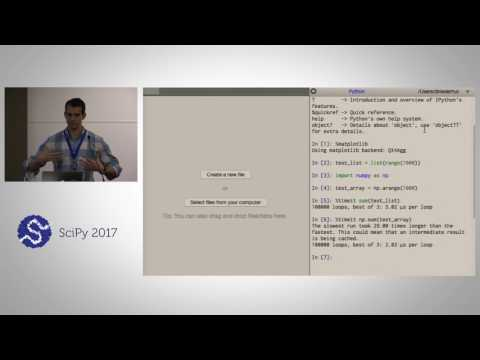

In [203]:
from IPython.display import YouTubeVideo
YouTubeVideo('lKcwuPnSHIQ')